# **Task 4**

Deadline: Wednesday at 11:59pm

1. **Data Exploration**
 * How many employees are in the dataset?
 * How many missing values exist in each column?
 * What are the unique job titles and departments?
 * Identify duplicate employee records and remove them.

2. **Data Cleaning**
 * Convert salaries from text to numeric (e.g., "$50,000" → 50000).
 * Standardize job titles (fix inconsistencies like “manager” vs. “Manager”) change everything to start with uppercase.
 * Fill missing values in performance scores using median or mean.
 * Detect and remove outliers in salary (any salaries too high/low?).
 * Convert date columns (e.g., "01-12-2023" as string → datetime format).

3. **Analysis**
 * What is the average salary of employees?
 * Which department has the highest average salary?
 * Which department has the lowest performance scores?
 * Which job title has the highest average salary?

4. **Department-Level Insights**
 * Which department has the most employees?
 * What is the salary distribution across departments?
 * Identify departments with the most missing data.

In [1]:
import pandas as pd
data=pd.read_csv('employee_performance_dataset.csv')
print(data)

     Employee_ID          Name        Department    Job_Title     Salary  \
0        EMP1000    Employee_0         Marketing      Analyst        NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   $70,000    
2        EMP1002    Employee_2  Customer Support      Manager        NaN   
3        EMP1003    Employee_3           Finance   Specialist        NaN   
4        EMP1004    Employee_4             Sales      Analyst  $150,000    
...          ...           ...               ...          ...        ...   
1015     EMP1899  Employee_899  Customer Support     engineer  $120,000    
1016     EMP1280  Employee_280  Customer Support     engineer  $120,000    
1017     EMP1883  Employee_883       Engineering  coordinator        NaN   
1018     EMP1761  Employee_761           Finance      analyst   $50,000    
1019     EMP1319  Employee_319         Marketing   specialist   $50,000    

      Experience_Years  Performance_Score   Join_Date  
0                  NaN         

In [2]:
name="Employee_ID"
num_Employee=len(data["Employee_ID"].unique())
print(f"number of employees are: {num_Employee}")

number of employees are: 1000


In [3]:
missing_values=data.isnull().sum()
print(missing_values)

Employee_ID            0
Name                   0
Department             0
Job_Title              0
Salary               123
Experience_Years     136
Performance_Score    162
Join_Date            157
dtype: int64


In [4]:
title=data['Job_Title'].unique()
print(f"Unique Job Title: {title}")
department=data['Department'].unique()
print(f"Unique department: {department}")


Unique Job Title: ['Analyst' 'Coordinator' 'Manager' 'Specialist' 'Executive' 'Engineer'
 'coordinator' 'specialist' 'manager' 'analyst' 'engineer' 'executive']
Unique department: ['Marketing' 'Customer Support' 'Finance' 'Sales' 'Engineering' 'HR']


In [5]:
data.duplicated()
data=data.drop_duplicates()
print(data)



     Employee_ID          Name        Department    Job_Title     Salary  \
0        EMP1000    Employee_0         Marketing      Analyst        NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   $70,000    
2        EMP1002    Employee_2  Customer Support      Manager        NaN   
3        EMP1003    Employee_3           Finance   Specialist        NaN   
4        EMP1004    Employee_4             Sales      Analyst  $150,000    
...          ...           ...               ...          ...        ...   
996      EMP1996  Employee_996             Sales    Executive  $120,000    
997      EMP1997  Employee_997       Engineering      Manager  $120,000    
998      EMP1998  Employee_998             Sales   specialist   $60,000    
999      EMP1999  Employee_999       Engineering      Manager   $45,000    
1013     EMP1973  Employee_973  Customer Support  coordinator  $150,000    

      Experience_Years  Performance_Score   Join_Date  
0                  NaN         

In [8]:
# data['Salary']=data['Salary'].str.replace("$","").str.replace(",","")
data['Salary'] = data['Salary'].replace(regex=True, to_replace=r"\D", value="")
data['Salary'] = pd.to_numeric(data['Salary'])
data['Salary']

0            NaN
1        70000.0
2            NaN
3            NaN
4       150000.0
          ...   
996     120000.0
997     120000.0
998      60000.0
999      45000.0
1013    150000.0
Name: Salary, Length: 1001, dtype: float64

In [ ]:
data['Job_Title']=data['Job_Title'].str.title()
data['Job_Title']

0           Analyst
1       Coordinator
2           Manager
3        Specialist
4           Analyst
           ...     
996       Executive
997         Manager
998      Specialist
999         Manager
1013    Coordinator
Name: Job_Title, Length: 1001, dtype: object

In [ ]:
mean=data['Performance_Score'].mean()
print(mean)
data['Performance_Score'].fillna(mean,inplace=True)
print(data)

2.9785969084423307
     Employee_ID          Name        Department    Job_Title   Salary  \
0        EMP1000    Employee_0         Marketing      Analyst      NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   70000    
2        EMP1002    Employee_2  Customer Support      Manager      NaN   
3        EMP1003    Employee_3           Finance   Specialist      NaN   
4        EMP1004    Employee_4             Sales      Analyst  150000    
...          ...           ...               ...          ...      ...   
996      EMP1996  Employee_996             Sales    Executive  120000    
997      EMP1997  Employee_997       Engineering      Manager  120000    
998      EMP1998  Employee_998             Sales   Specialist   60000    
999      EMP1999  Employee_999       Engineering      Manager   45000    
1013     EMP1973  Employee_973  Customer Support  Coordinator  150000    

      Experience_Years  Performance_Score   Join_Date  
0                  NaN           3.0

C:\Users\GAM GEOFREY\AppData\Local\Temp\ipykernel_2132\307066000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Performance_Score'].fillna(mean,inplace=True)


In [9]:
Q1=data['Salary'].quantile(0.25)
Q3=data['Salary'].quantile(0.75)
IQR=Q3-Q1
Too_low=Q1-1.5*IQR
Too_high=Q3-1.5*IQR
data=data[(data['Salary']>=Too_low) & (data['Salary']>=Too_high)]
print(data)  



     Employee_ID          Name        Department    Job_Title    Salary  \
1        EMP1001    Employee_1         Marketing  Coordinator   70000.0   
4        EMP1004    Employee_4             Sales      Analyst  150000.0   
5        EMP1005    Employee_5         Marketing    Executive   50000.0   
7        EMP1007    Employee_7       Engineering   Specialist   45000.0   
8        EMP1008    Employee_8         Marketing     Engineer   50000.0   
...          ...           ...               ...          ...       ...   
996      EMP1996  Employee_996             Sales    Executive  120000.0   
997      EMP1997  Employee_997       Engineering      Manager  120000.0   
998      EMP1998  Employee_998             Sales   specialist   60000.0   
999      EMP1999  Employee_999       Engineering      Manager   45000.0   
1013     EMP1973  Employee_973  Customer Support  coordinator  150000.0   

      Experience_Years  Performance_Score   Join_Date  
1                  5.0                3.0  

In [ ]:
data['Join_Date']=pd.to_datetime(data['Join_Date'], format='mixed')
data['Join_Date']

0      2018-03-30
1             NaT
2      2019-06-25
3      2020-01-10
4      2020-01-10
          ...    
996           NaT
997           NaT
998    2017-07-20
999           NaT
1013   2020-01-10
Name: Join_Date, Length: 1001, dtype: datetime64[ns]

In [10]:
Average_data=data['Salary'].mean()
print(Average_data)


82054.21686746988


In [11]:
highest_dept=data.groupby('Department')['Salary'].mean().idxmax()
print(highest_dept)


Customer Support


In [ ]:
lowest_dept=data.groupby('Department')['Performance_Score'].mean().idxmin()
print(lowest_dept)

Customer Support


In [12]:
highest_job_title=data.groupby('Job_Title')['Salary'].mean().idxmax()
print(f"{highest_job_title}")

coordinator


In [ ]:
most_employees_dept= data['Department'].value_counts().idxmax()
print(f"{most_employees_dept}")

Customer Support


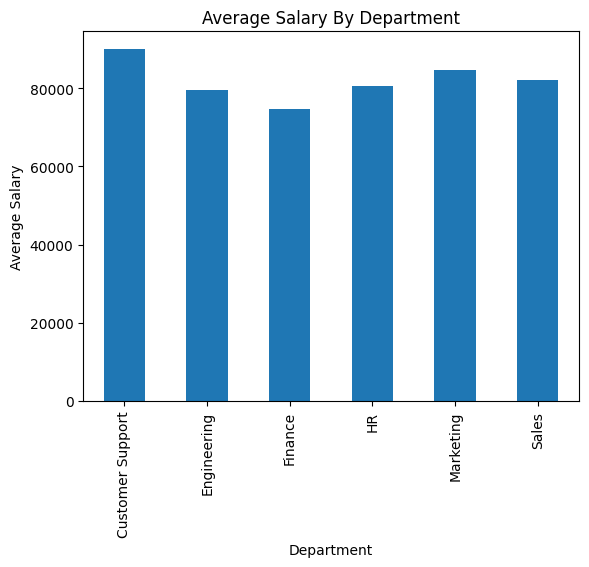

In [13]:
import matplotlib.pyplot as plt
data.groupby('Department')['Salary'].mean().plot(kind='bar')
plt.title('Average Salary By Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

In [ ]:
data=pd.read_csv('employee_performance_dataset.csv')
print(data.isnull().sum().idxmax())

Performance_Score
